In [13]:
# intro

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE


titanic_exo = pd.read_csv("titanic-passengers.csv",sep=";")
titanic_exo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
titanic_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 62.7+ KB


In [3]:


titanic_exo["Age"].fillna(titanic_exo["Age"].mean(),inplace=True)
titanic_exo["Survived"] = titanic_exo["Survived"].map({"Yes": 1, "No": 0})   
titanic_exo["Sex"] = titanic_exo["Sex"].map({"female": 1, "male": 0}) 
titanic_exo



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,NaN,S


In [4]:
titanic_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 69.7+ KB


In [6]:
# defining our x columns (featurs) and y the target
x = titanic_exo[['Age','Sex','Pclass']]
y = titanic_exo['Survived']

# split data to train/test with% of 80/20
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# applying and fitting LR algo
model = LogisticRegression()
model.fit(x_train, y_train) 

# prdict the Y_testing & Y_training
y_pred_test  = model.predict(x_test) 
y_pred_train=model.predict(x_train)

#print the accuracy 
print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

Accuracy=0.81


In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label')

ValueError: Found input variables with inconsistent numbers of samples: [179, 891]

In [ ]:
# evaluating the model using confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

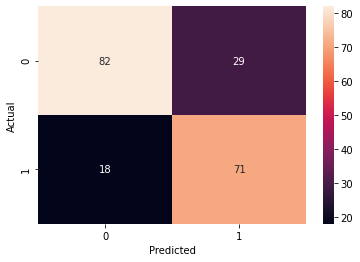

In [8]:
# visualizing confusion matrix of train using heatmap 

confusion_matrix_train = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap((confusion_matrix_train/np.sum(confusion_matrix_train))*100, annot=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

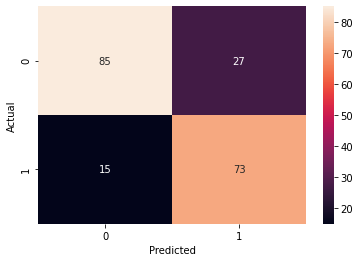

In [10]:
# confusion matrix of test

confusion_matrix_test = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap((confusion_matrix_test/np.sum(confusion_matrix_test))*100, annot=True)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [179, 891]

ROC 
Receiver Operating Characteristic curve is a plot of the true positive rate against the false positive rate.

AUC
The Area Under the ROC curve is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.





In [20]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'X_test' is not defined